<a href="https://colab.research.google.com/github/shannonshih/Tibame_GAD245-Practice-HW_0221/blob/main/2_02_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

# KNN 演算法定義

KNN（K-Nearest Neighbors，K 最近鄰演算法）是一種常見的機器學習演算法，主要用於分類和回歸問題。其基本原理是：當需要對一個未知的資料點進行分類或預測時，KNN 會根據該點與訓練資料集中其它點的距離，選擇最接近的 K 個鄰居，然後根據這些鄰居的標籤來做出決策。

## KNN 的基本步驟

1. **計算距離**：計算待分類或預測點與所有訓練資料點之間的距離（常用的距離度量方法有歐幾里得距離、曼哈頓距離等）。
2. **選擇 K 個鄰居**：根據計算出的距離，選擇距離最近的 K 個鄰居。
3. **分類或回歸**：
   - **分類問題**：根據 K 個鄰居的標籤（類別）進行投票，選擇出現次數最多的類別作為預測結果。
   - **回歸問題**：取 K 個鄰居標籤的平均值作為預測結果。

## 特點

- **非參數方法**：KNN 不需要對資料進行顯式的建模，直接利用訓練數據來進行預測。
- **基於實例學習**：KNN 是一種基於實例的學習方法，通過比較測試資料與訓練資料的相似度來進行預測。

## 優點

- **簡單易懂**：KNN 是一個直觀且容易理解的演算法，並且實現簡單。
- **無需訓練階段**：KNN 不需要顯式的訓練過程，所有的計算都在測試階段進行。
- **適用於多類別分類問題**：KNN 可以輕鬆地應用於多類別的分類問題。
- **能處理非線性資料**：由於 KNN 是基於資料點之間的距離來進行預測，因此它對於非線性問題有較好的適應性。

## 缺點

- **計算量大**：KNN 在預測階段需要計算每個測試點與所有訓練資料點的距離，因此當資料集非常大時，計算量會變得很大，導致預測速度較慢。
- **需要大量的記憶體**：KNN 必須將所有訓練資料保存在記憶體中，因此當資料集很大時，會消耗大量的記憶體資源。
- **對噪聲敏感**：KNN 演算法對資料中的噪聲（例如錯誤標籤或異常點）比較敏感，噪聲資料可能會影響鄰居的選擇，進而影響預測結果。
- **高維度問題**：當資料的維度很高時（即特徵數量多），KNN 可能會受到"維度災難"的影響，導致計算變得低效且預測結果不準確。
- **無法解釋模型**：KNN 是一種基於實例的學習方法，因此其預測過程缺乏模型解釋性，難以理解為何會做出某個預測。


## 參考資料
* Python Data Science Handbook, Jake VanderPlas
* Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, Aurélien Géron

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 實作KNN
從訓練資料中找出最接近的幾筆資料，然後看哪個類別的資料筆數最多

In [2]:
import pandas as pd
import numpy as np
iris = pd.read_csv('/content/drive/MyDrive/AI人才應用/20250109T010859Z-001/2024-12 AI數據應用人才養成班/data/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 找出與test最近的資料點
test = [5.0, 3.6, 1.4, 0.2] #要用來尋找類別的測試資料

#分別計算四個欄位的總距離，使用歐幾里得距離
s1 = (iris['SepalLengthCm'] - test[0])**2
s2 = (iris['SepalWidthCm'] - test[1])**2
s3 = (iris['PetalLengthCm'] - test[2])**2
s4 = (iris['PetalWidthCm'] - test[3])**2
d = (s1+s2+s3+s4)**0.5
iris.iloc[np.argmin(d)]

,4
Id,5
SepalLengthCm,5.0
SepalWidthCm,3.6
PetalLengthCm,1.4
PetalWidthCm,0.2
Species,Iris-setosa


In [4]:
# 找出與test最近的K個資料點
K = 6
test = [5.0, 3.6, 1.4, 0.2]
s1 = (iris['SepalLengthCm'] - test[0])**2
s2 = (iris['SepalWidthCm'] - test[1])**2
s3 = (iris['PetalLengthCm'] - test[2])**2
s4 = (iris['PetalWidthCm'] - test[3])**2
d = (s1+s2+s3+s4)**0.5
iris.iloc[np.argsort(d)][0:K]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,5,5.0,3.6,1.4,0.2,Iris-setosa
0,1,5.1,3.5,1.4,0.2,Iris-setosa
17,18,5.1,3.5,1.4,0.3,Iris-setosa
40,41,5.0,3.5,1.3,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
39,40,5.1,3.4,1.5,0.2,Iris-setosa


## KNN 視覺化

In [5]:
# https://rasbt.github.io/mlxtend/
# 這裡為了將KNN決策區域的視覺化，所以需要安裝額外的套件
! pip install mlxtend

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [7]:
def knn_comparison(data, k):
    x = data[['X','Y']].values
    y = data['class'].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K='+ str(k))
    plt.show()

### U Shaped

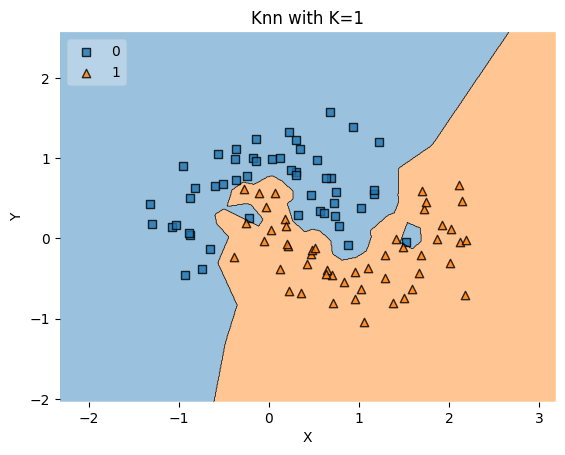

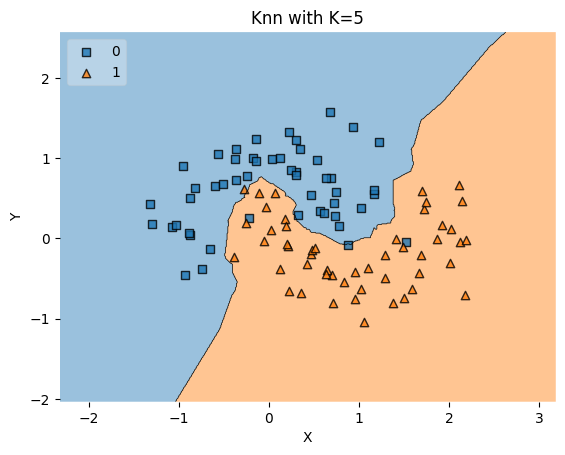

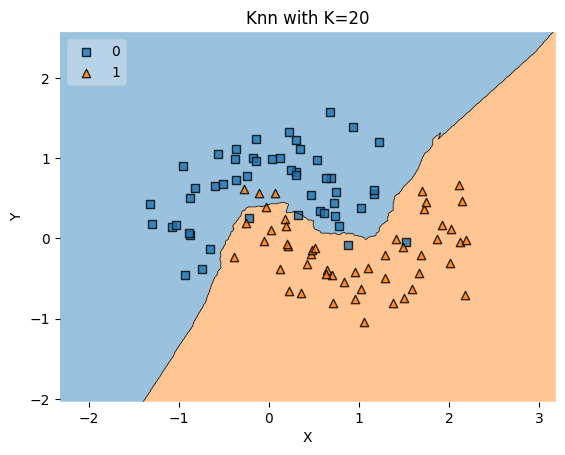

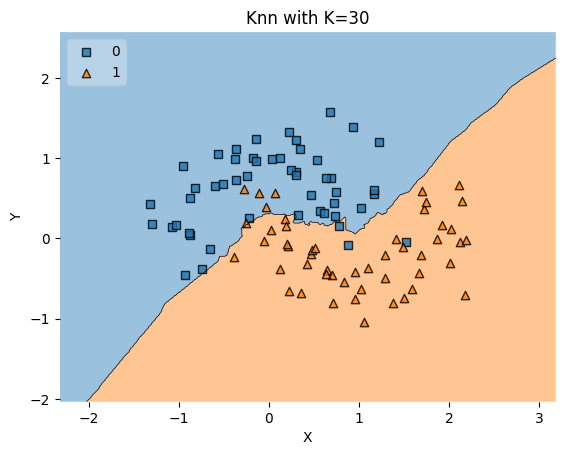

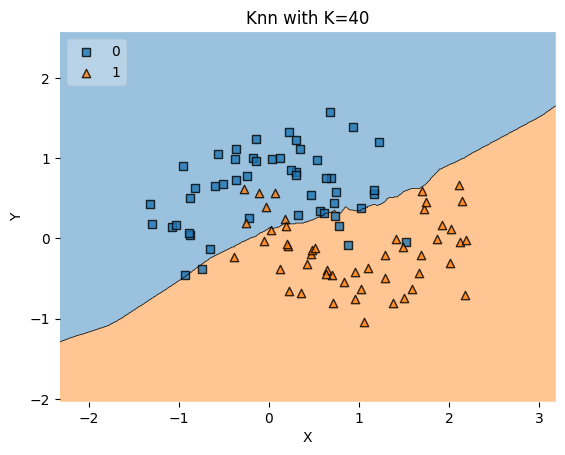

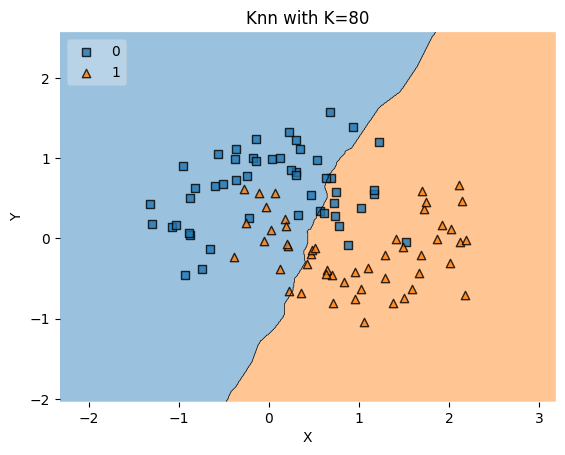

In [8]:
data = pd.read_csv('/content/drive/MyDrive/AI人才應用/機器學習演算法與應用-20250217T023104Z-001/機器學習演算法與應用/演算法測試資料/ushape.csv')
for i in [1,5,20,30,40,80]:
    knn_comparison(data, i)

### 兩個類別資料互相被同心圓包圍 Two set concentric circles

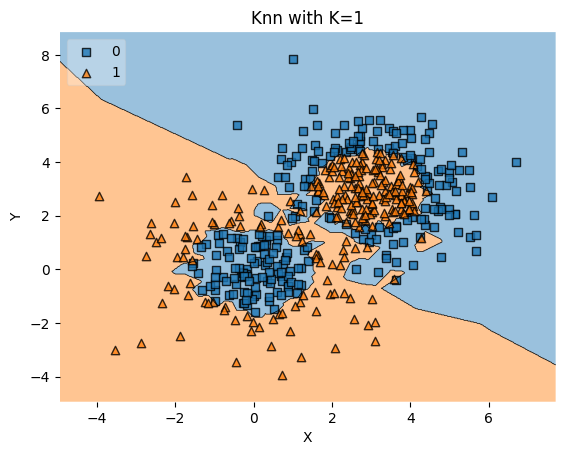

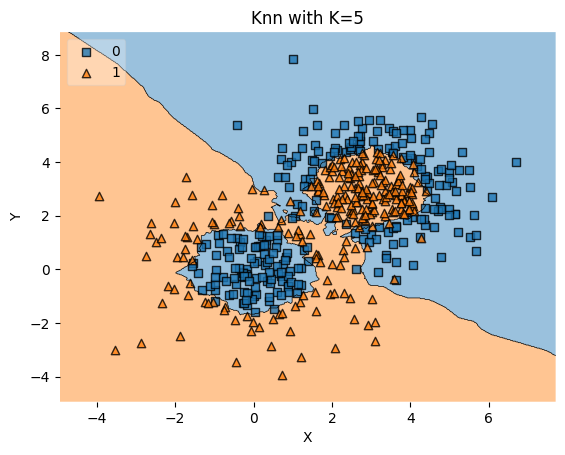

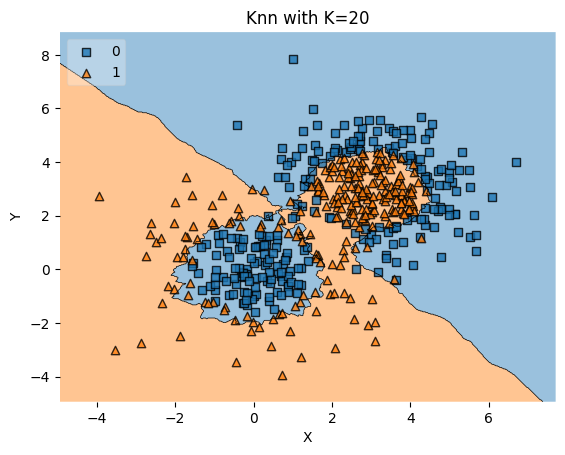

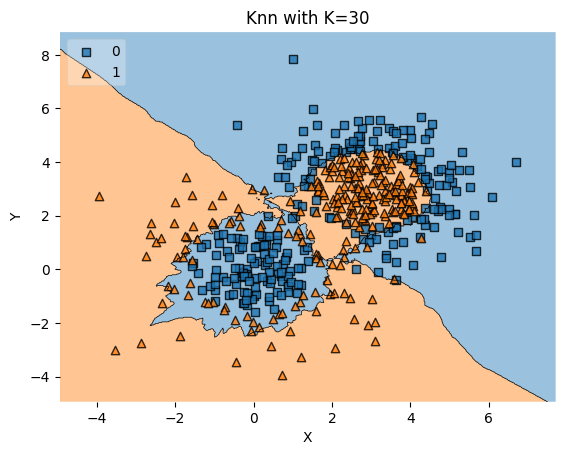

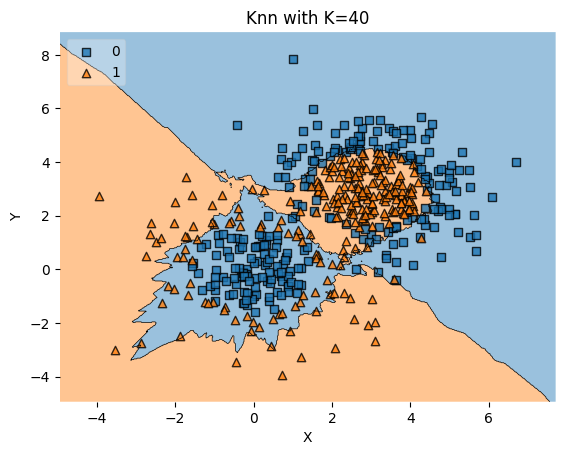

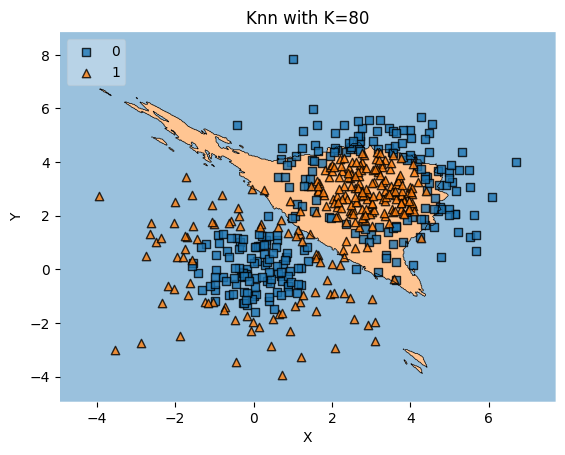

In [ ]:
data = pd.read_csv('../data/演算法測試資料/concertriccir2.csv')
for i in [1,5,20,30,40,80]:
    knn_comparison(data, i)

### XOR

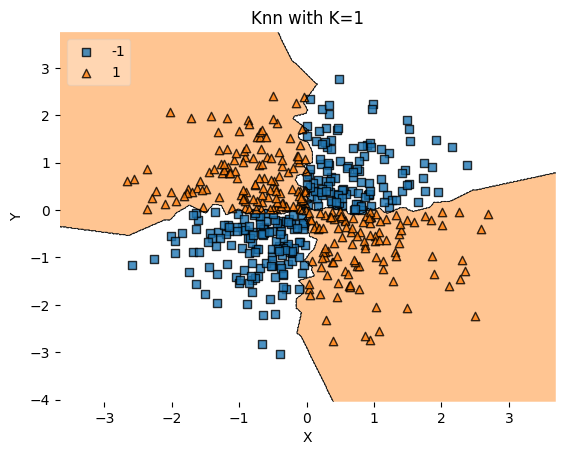

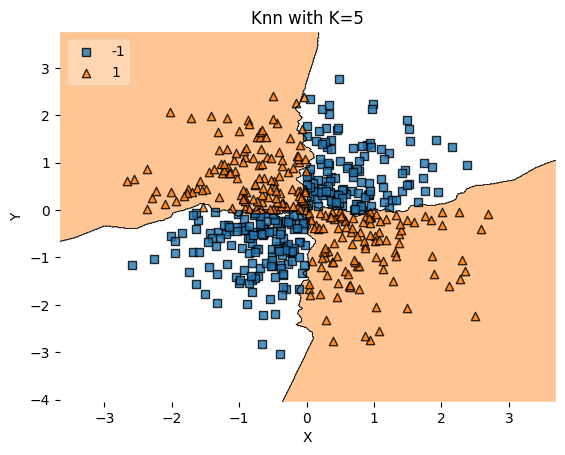

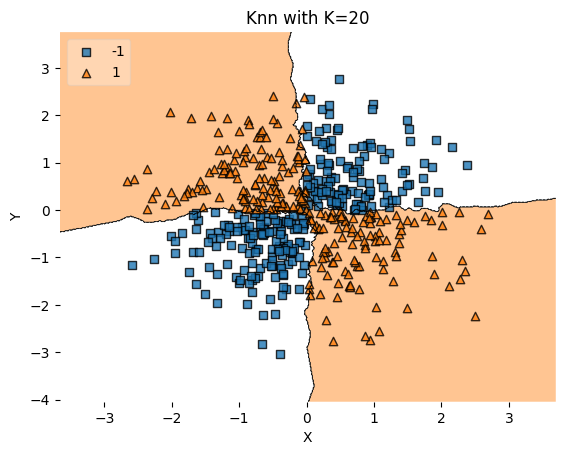

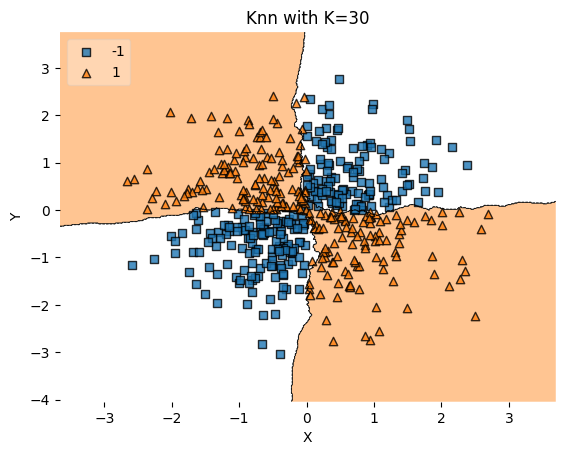

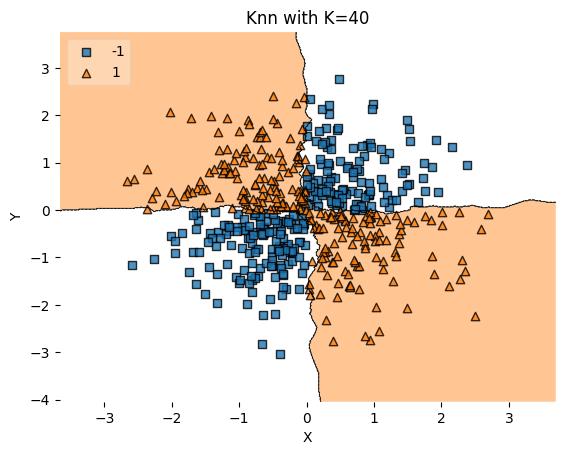

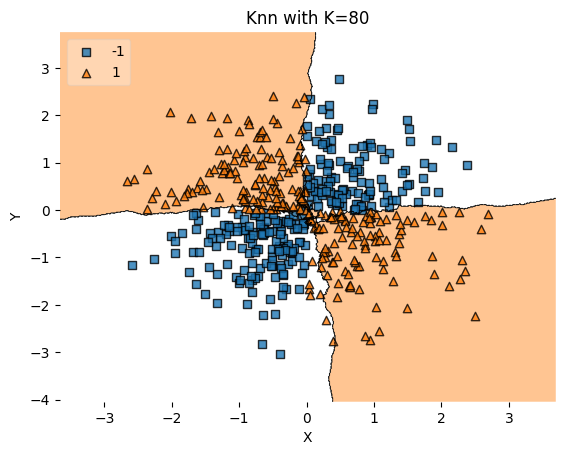

In [ ]:
data = pd.read_csv('../data/演算法測試資料/xor.csv')
for i in [1,5,20,30,40,80]:
    knn_comparison(data, i)

### Linearly separable

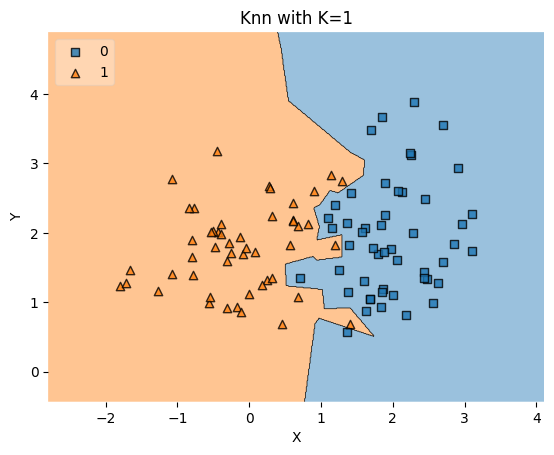

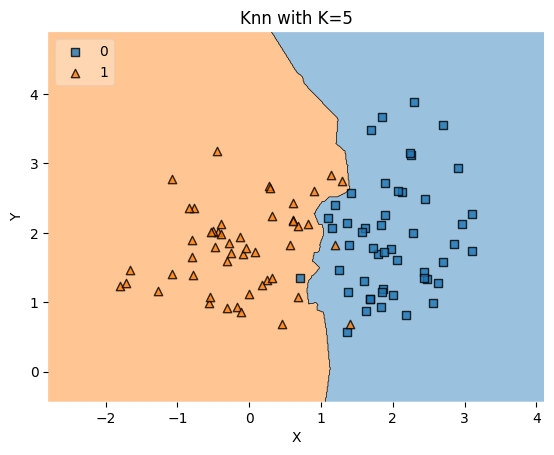

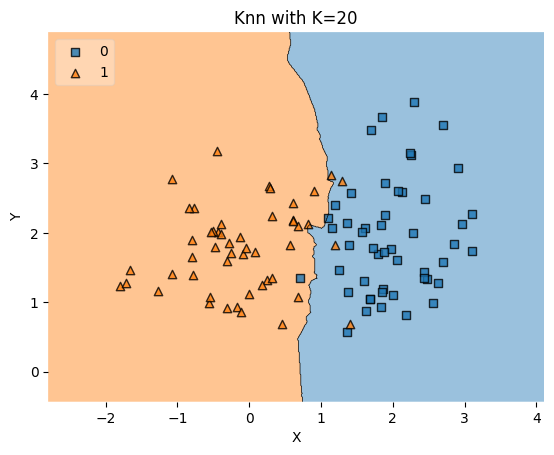

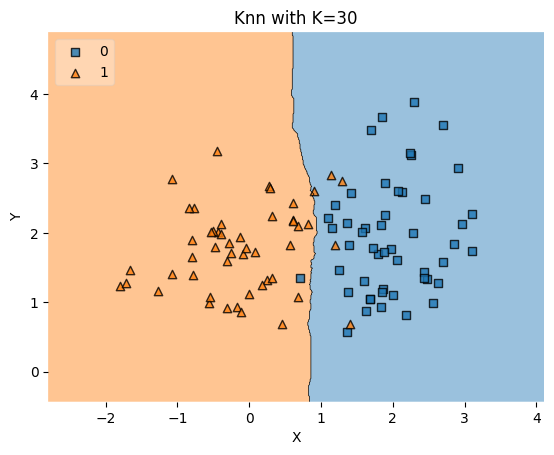

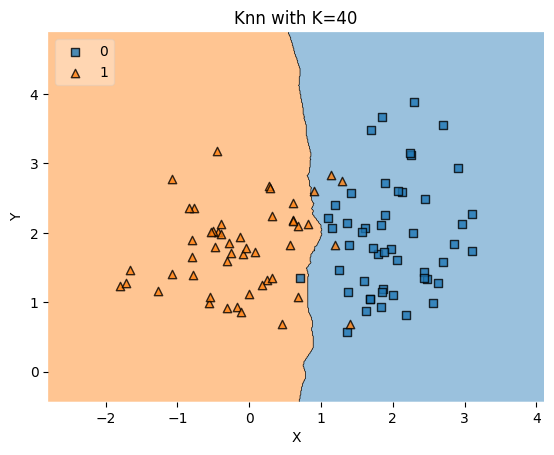

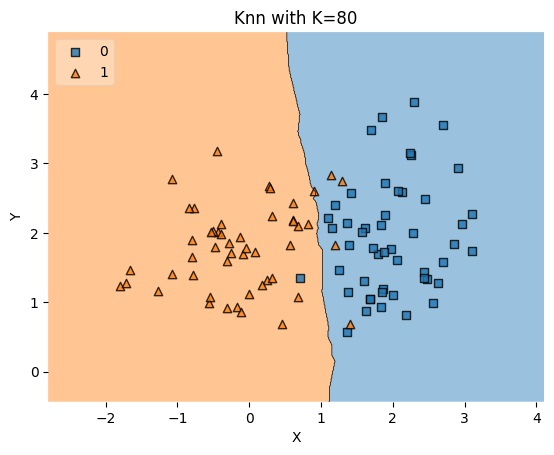

In [ ]:
data = pd.read_csv('../data/演算法測試資料/linearsep.csv')
for i in [1,5,20,30,40,80]:
    knn_comparison(data, i)

### Outliers 有離異群的資料

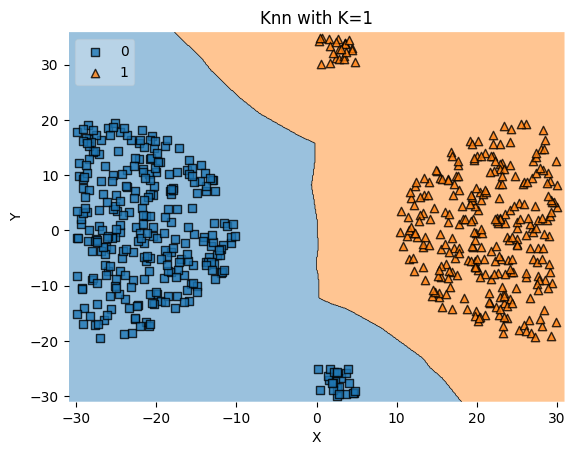

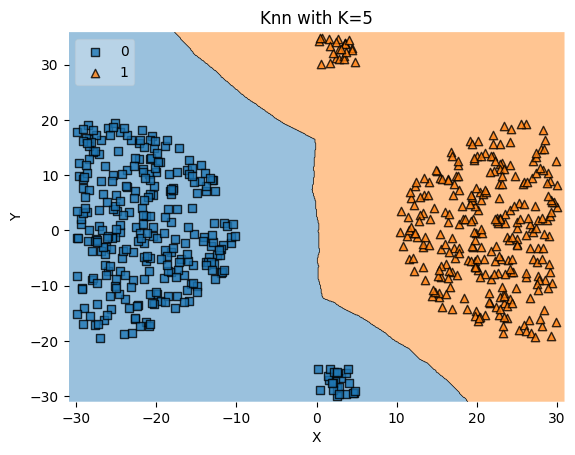

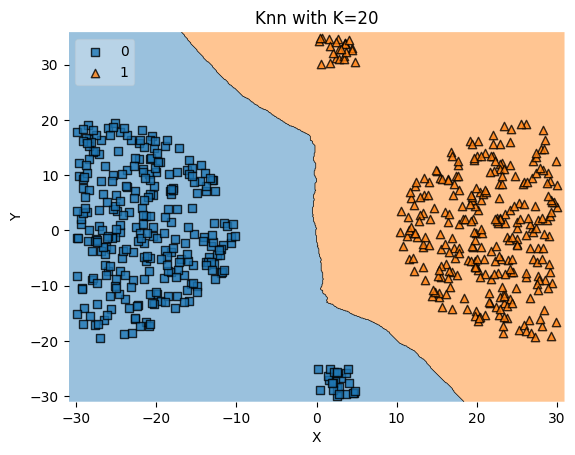

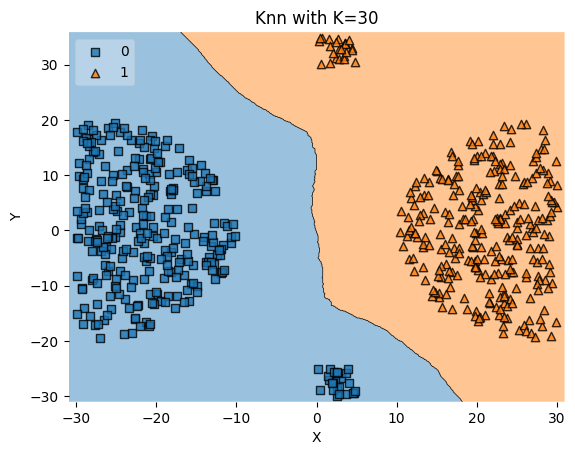

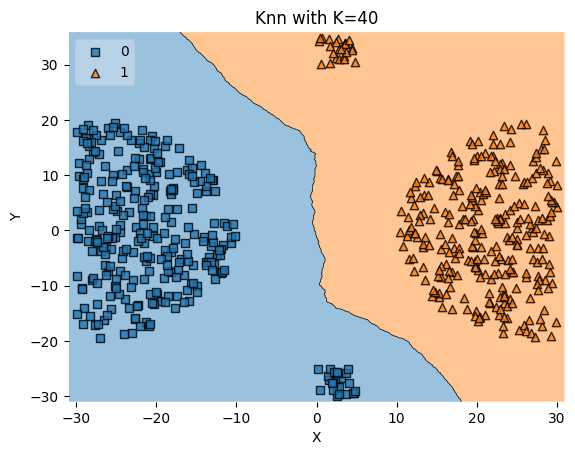

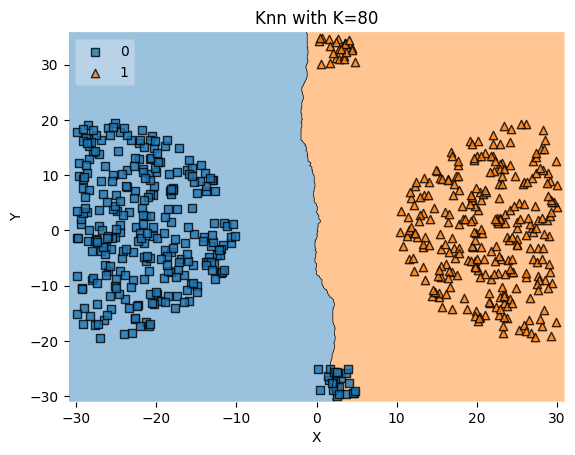

In [ ]:
data = pd.read_csv('../data/演算法測試資料/outlier.csv')
for i in [1,5,20,30,40,80]:
    knn_comparison(data, i)

# 範例
使用 Iris

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

iris = pd.read_csv("../data/Iris.csv")

train, test = train_test_split(iris, test_size = 0.3, random_state=0)

train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train['Species'] # output of our training data
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y = test['Species']   #output value of test data

model = KNeighborsClassifier(n_neighbors=5)

model.fit(train_X,train_y) #訓練模組

prediction = model.predict(test_X) #使用訓練好的模組來測試
print('The test accuracy is:', metrics.accuracy_score(test_y,prediction))

prediction = model.predict(train_X) #使用訓練好的模組來測試
print('The training accuracy is:', metrics.accuracy_score(train_y,prediction))


The test accuracy is: 0.9777777777777777
The training accuracy is: 0.9714285714285714


## 測試調整不同的K值是否會影響正確率

In [ ]:
for K in [1,3,5,10,20,30,50]:
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(train_X,train_y) #訓練模組
    prediction = model.predict(test_X) #使用訓練好的模組來測試
    print('K = ', K, ', accuracy is:', metrics.accuracy_score(prediction,test_y))

K =  1 , accuracy is: 0.9777777777777777
K =  3 , accuracy is: 0.9777777777777777
K =  5 , accuracy is: 0.9777777777777777
K =  10 , accuracy is: 0.9777777777777777
K =  20 , accuracy is: 0.9777777777777777
K =  30 , accuracy is: 0.9555555555555556
K =  50 , accuracy is: 0.9111111111111111


# 資料前處理
## 如果其中一個欄位使用不同的尺度會怎樣？

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

iris = pd.read_csv("../data/Iris.csv")

iris['SepalWidthCm'] = iris['SepalWidthCm']*100

train, test = train_test_split(iris, test_size = 0.3, random_state=0)

train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train['Species'] # output of our training data
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y = test['Species']   #output value of test data

model = KNeighborsClassifier()

model.fit(train_X,train_y) #訓練模組

prediction = model.predict(test_X) #使用訓練好的模組來測試
print('The accuracy is:', metrics.accuracy_score(prediction,test_y))

The accuracy is: 0.7555555555555555


## 使用標準差進行前處理

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X)
train_X_new = scaler.transform(train_X)
test_X_new = scaler.transform(test_X)

model = KNeighborsClassifier()

model.fit(train_X_new,train_y) #訓練模組

prediction = model.predict(test_X_new) #使用訓練好的模組來測試
print('The accuracy is:', metrics.accuracy_score(prediction,test_y))

The accuracy is: 0.9777777777777777


## 使用PCA進行處理

In [ ]:
from sklearn.decomposition import PCA

scaler = PCA()
scaler.fit(train_X)
train_X_new = scaler.transform(train_X)
test_X_new = scaler.transform(test_X)

model = KNeighborsClassifier()

model.fit(train_X_new,train_y) #訓練模組

prediction = model.predict(test_X_new) #使用訓練好的模組來測試
print('The accuracy is:', metrics.accuracy_score(prediction,test_y))

The accuracy is: 0.7555555555555555


## 使用LDA進行前處理

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

scaler = LinearDiscriminantAnalysis()
scaler.fit(train_X,train_y)
train_X_new = scaler.transform(train_X)
test_X_new = scaler.transform(test_X)

model = KNeighborsClassifier()

model.fit(train_X_new,train_y) #訓練模組

prediction = model.predict(test_X_new) #使用訓練好的模組來測試
print('The accuracy is:', metrics.accuracy_score(prediction,test_y))

The accuracy is: 0.9555555555555556
